In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
sns.set_context("talk") #get presentation-ready visuals

Metrics explanation is taken from [here](https://stackoverflow.com/questions/70169219/what-is-total-loss-loss-cls-etc)
For more info about the metrics see [here](https://www.geeksforgeeks.org/region-proposal-network-rpn-in-object-detection/) and [here](https://www.kdnuggets.com/2020/08/metrics-evaluate-deep-learning-object-detectors.html)

`total_loss`: This is a weighted sum of the following individual losses calculated during the iteration. By default, the weights are all one.

`loss_cls`: Classification loss in the ROI head. Measures the loss for box classification, i.e., how good the model is at labelling a predicted box with the correct class.

`loss_box_reg`: Localisation loss in the ROI head. Measures the loss for box localisation (predicted location vs true location).

`loss_rpn_cls`: Classification loss in the Region Proposal Network. Measures the "objectness" loss, i.e., how good the RPN is at labelling the anchor boxes as foreground or background.

`loss_rpn_loc`: Localisation loss in the Region Proposal Network. Measures the loss for localisation of the predicted regions in the RPN.

`loss_mask`: Mask loss in the Mask head. Measures how "correct" the predicted binary masks are.

`time`: Time taken by the iteration.

`data_time`: Time taken by the dataloader in that iteration.

`lr`: The learning rate in that iteration.

`max_mem`: Maximum GPU memory occupied by tensors in bytes.

In [3]:
def read_metrics(metrics_path):
    metrics_list = []
    with open(metrics_path) as file:
     for line in file:
            metrics_list.append(json.loads(line))
    df = pd.DataFrame(metrics_list)
    return df

In [4]:
lable1 = 'mask_rcnn_R_50_FPN_3x'
metrics_path1 = '../models/"mask_rcnn_R_50_FPN_3x/metrics.json'
df1 = read_metrics(metrics_path1)
df1['model'] = lable1
print("Dataset size:",len(df1),"rows")
df1.sample(5)

Dataset size: 5000 rows


data_time   eta_seconds  fast_rcnn/cls_accuracy  \
1329   0.121705  24557.286523                0.892020   
1683   0.104590  17164.667826                0.905971   
328    0.094607  45053.343383                0.887556   
802    0.085463  35429.118909                0.903739   
4617   0.019967   6413.662031                0.919271   

      fast_rcnn/false_negative  fast_rcnn/fg_cls_accuracy  iteration  \
1329                  0.533290                   0.190849      26599   
1683                  0.498022                   0.238539      33679   
328                   0.617292                   0.133118       6579   
802                   0.519769                   0.221588      16059   
4617                  0.413042                   0.367609      92359   

      loss_box_reg  loss_cls  loss_mask  loss_rpn_cls  ...  \
1329      0.325881  0.489013   0.204963      0.006446  ...   
1683      0.311545  0.502892   0.224131      0.005759  ...   
328       0.375436  0.623168   0.248536      0.008547  ...   
802       0.315734  0.447399   0.229551      0.006090  ...   
4617      0.262821  0.334293   0.151900      0.006400  ...   

      mask_rcnn/false_negative  mask_rcnn/false_positive  rank_data_time  \
1329                  0.093343                  0.075697        0.121705   
1683                  0.133265                  0.058690        0.104590   
328                   0.102680                  0.088836        0.094607   
802                   0.100307                  0.091022        0.085463   
4617                  0.071456                  0.042580        0.019967   

      roi_head/num_bg_samples  roi_head/num_fg_samples  rpn/num_neg_anchors  \
1329               226.071429                29.928571           249.500000   
1683               226.428571                29.571429           248.785714   
328                224.000000                32.000000           249.928571   
802                226.000000                30.000000           249.500000   
4617               227.250000                28.750000           250.500000   

      rpn/num_pos_anchors      time  total_loss                  model  
1329             6.500000  1.077490    1.026343  mask_rcnn_R_50_FPN_3x  
1683             7.214286  1.026409    1.072873  mask_rcnn_R_50_FPN_3x  
328              6.071429  1.039098    1.255064  mask_rcnn_R_50_FPN_3x  
802              6.500000  1.035976    1.030572  mask_rcnn_R_50_FPN_3x  
4617             5.500000  0.835945    0.805543  mask_rcnn_R_50_FPN_3x  

[5 rows x 23 columns]

In [5]:
lable2 = 'mask_rcnn_R_50_FPN_3x_aug'
metrics_path2 = '../models/"mask_rcnn_R_50_FPN_3x_aug/metrics.json'
df2 = read_metrics(metrics_path2)
df2['model'] = lable2
print("Dataset size:",len(df2),"rows")
df2.sample(5)

Dataset size: 5076 rows


data_time   eta_seconds  fast_rcnn/cls_accuracy  \
4102   0.011476   7928.211317                0.951823   
1955   0.012594  24866.837373                0.944792   
284    0.010217  37359.639434                0.942708   
460    0.008829  36618.921824                0.948177   
1823   0.010679  25700.706476                0.947396   

      fast_rcnn/false_negative  fast_rcnn/fg_cls_accuracy  iteration  \
4102                  0.490657                   0.217650      80539   
1955                  0.577669                   0.169222      38279   
284                   0.837161                   0.034422       5699   
460                   0.638570                   0.097873       9219   
1823                  0.673913                   0.147096      35639   

      loss_box_reg  loss_cls  loss_mask  loss_rpn_cls  ...  \
4102      0.125533  0.226280   0.158568      0.004649  ...   
1955      0.162681  0.297725   0.184431      0.005042  ...   
284       0.174963  0.354636   0.229358      0.007750  ...   
460       0.162836  0.307390   0.245376      0.004716  ...   
1823      0.134805  0.283822   0.157133      0.004308  ...   

      mask_rcnn/false_negative  mask_rcnn/false_positive  rank_data_time  \
4102                  0.083031                  0.042153        0.011476   
1955                  0.124058                  0.038039        0.012594   
284                   0.234397                  0.055263        0.010217   
460                   0.185183                  0.064818        0.008829   
1823                  0.136906                  0.028400        0.010679   

      roi_head/num_bg_samples  roi_head/num_fg_samples  rpn/num_neg_anchors  \
4102                  451.500                   28.500              249.500   
1955                  448.375                   31.625              249.625   
284                   449.875                   30.125              250.250   
460                   451.750                   28.250              250.375   
1823                  450.750                   29.250              250.000   

      rpn/num_pos_anchors      time  total_loss                      model  
4102                6.500  0.403046    0.550632  mask_rcnn_R_50_FPN_3x_aug  
1955                6.375  0.412075    0.699993  mask_rcnn_R_50_FPN_3x_aug  
284                 5.750  0.390478    0.842939  mask_rcnn_R_50_FPN_3x_aug  
460                 5.625  0.398537    0.718967  mask_rcnn_R_50_FPN_3x_aug  
1823                6.000  0.411342    0.577108  mask_rcnn_R_50_FPN_3x_aug  

[5 rows x 23 columns]

In [6]:
df = pd.concat([df1,df2])
print("Dataset size:",len(df),"rows")

Dataset size: 10076 rows


In [7]:
df.describe().T

count          mean           std         min  \
data_time                  10076.0      0.038038      0.041527    0.005403   
eta_seconds                10076.0  21664.554988  12783.946450    0.000000   
fast_rcnn/cls_accuracy     10076.0      0.926214      0.024999    0.001563   
fast_rcnn/false_negative   10076.0      0.557979      0.105532    0.000000   
fast_rcnn/fg_cls_accuracy  10076.0      0.206076      0.088431    0.000000   
iteration                  10076.0  49891.413656  28794.062801   19.000000   
loss_box_reg               10076.0      0.221001      0.072320    0.092435   
loss_cls                   10076.0      0.367010      0.136339    0.153129   
loss_mask                  10076.0      0.198523      0.045034    0.116530   
loss_rpn_cls               10076.0      0.005949      0.001787    0.001666   
loss_rpn_loc               10076.0      0.008502      0.001374    0.004143   
lr                         10076.0      0.002488      0.000141    0.000050   
mask_rcnn/accuracy         10076.0      0.916143      0.024117    0.485863   
mask_rcnn/false_negative   10076.0      0.126186      0.049538    0.043547   
mask_rcnn/false_positive   10076.0      0.055695      0.020673    0.019835   
rank_data_time             10076.0      0.038038      0.041527    0.005403   
roi_head/num_bg_samples    10076.0    339.473931    112.512516  220.333333   
roi_head/num_fg_samples    10076.0     29.370849      2.275596   20.000000   
rpn/num_neg_anchors        10076.0    249.668103      0.624944  246.375000   
rpn/num_pos_anchors        10076.0      6.331897      0.624944    4.250000   
time                       10076.0      0.672648      0.279104    0.369035   
total_loss                 10076.0      0.816262      0.218478    0.415882   

                                    25%           50%           75%  \
data_time                      0.010114      0.013140      0.035887   
eta_seconds                10737.688270  21717.614062  32025.206738   
fast_rcnn/cls_accuracy         0.906576      0.930990      0.946615   
fast_rcnn/false_negative       0.475762      0.559382      0.627227   
fast_rcnn/fg_cls_accuracy      0.142238      0.193962      0.271661   
iteration                  25199.000000  49629.000000  74819.000000   
loss_box_reg                   0.152795      0.219589      0.282821   
loss_cls                       0.285193      0.353630      0.428026   
loss_mask                      0.172728      0.189915      0.212623   
loss_rpn_cls                   0.004781      0.005741      0.006849   
loss_rpn_loc                   0.007546      0.008443      0.009370   
lr                             0.002500      0.002500      0.002500   
mask_rcnn/accuracy             0.909329      0.920483      0.929169   
mask_rcnn/false_negative       0.095292      0.116837      0.145310   
mask_rcnn/false_positive       0.043609      0.052787      0.063539   
rank_data_time                 0.010114      0.013140      0.035887   
roi_head/num_bg_samples      226.214286    444.000000    451.250000   
roi_head/num_fg_samples       27.875000     29.416667     30.857143   
rpn/num_neg_anchors          249.250000    249.666667    250.125000   
rpn/num_pos_anchors            5.875000      6.333333      6.750000   
time                           0.405100      0.430520      0.973086   
total_loss                     0.660778      0.796761      0.932013   

                                    max  
data_time                      0.152765  
eta_seconds                51608.959876  
fast_rcnn/cls_accuracy         0.966146  
fast_rcnn/false_negative       1.000000  
fast_rcnn/fg_cls_accuracy      0.493991  
iteration                  99999.000000  
loss_box_reg                   0.447497  
loss_cls                       6.176794  
loss_mask                      0.693295  
loss_rpn_cls                   0.038428  
loss_rpn_loc                   0.020542  
lr                             0.002500  
mask_rcnn/accuracy             0.953908  
mask_rcnn/fa

## Total loss

In [8]:
for var in ['total_loss']:
    plt.figure()
    sns.lineplot(linewidth=0.5,y=var,data=df[df['iteration']>50],x='iteration',hue='model')

## Classification loss metrics

In [9]:
for var in ['loss_cls','fast_rcnn/cls_accuracy','fast_rcnn/fg_cls_accuracy','loss_rpn_cls',]:
    plt.figure()
    sns.lineplot(linewidth=0.5,y=var,data=df[df['iteration']>50],x='iteration',hue='model')

## Localisation loss values

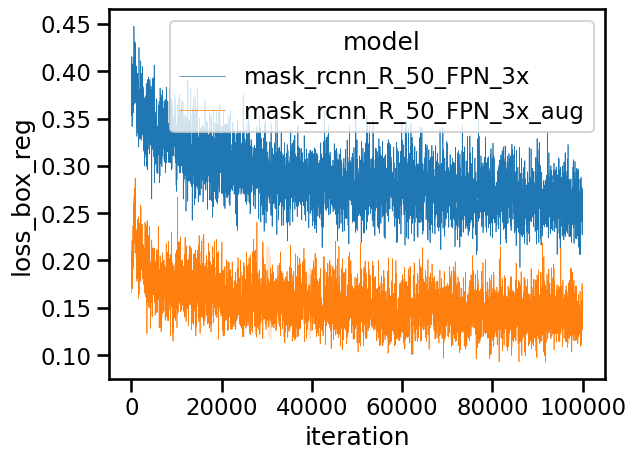

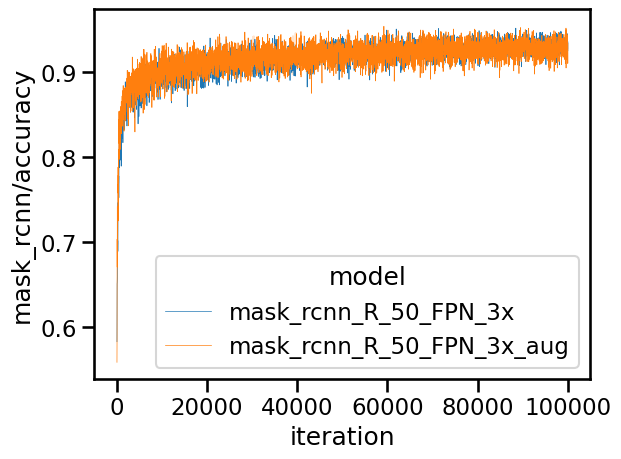

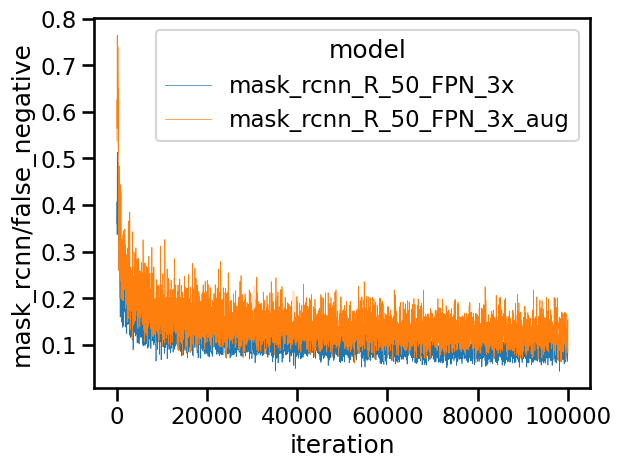

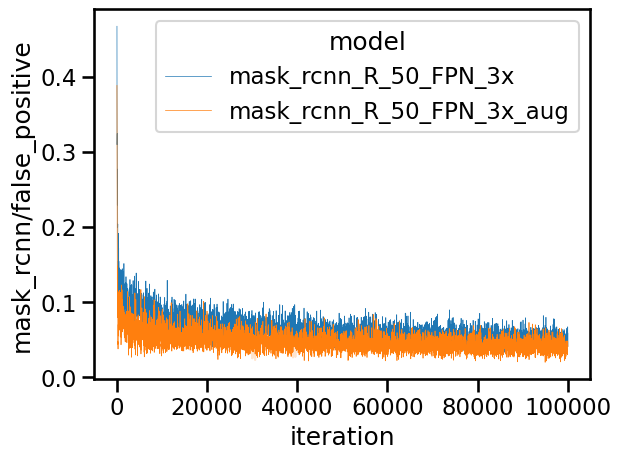

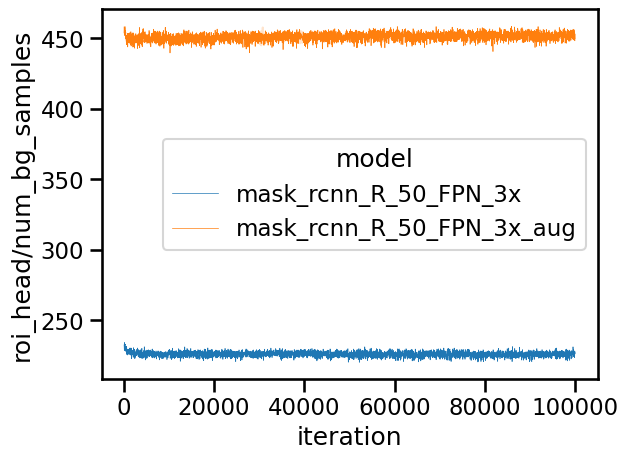

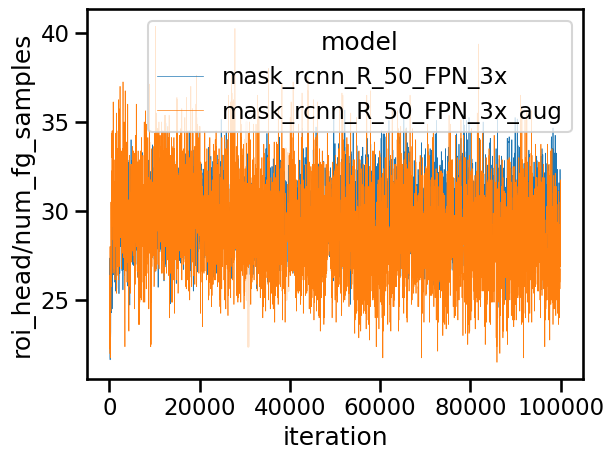

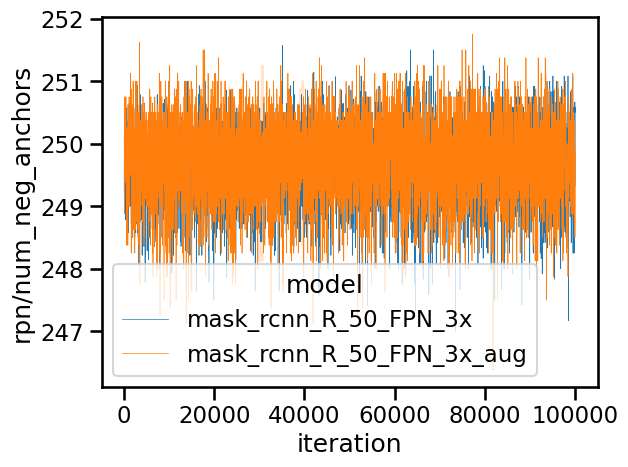

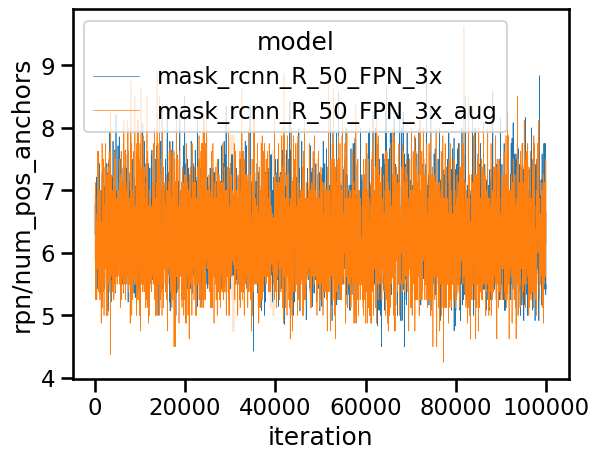

In [10]:
for var in ['loss_box_reg','loss_mask','loss_rpn_loc','mask_rcnn/accuracy','mask_rcnn/false_negative','mask_rcnn/false_positive',
           'roi_head/num_bg_samples','roi_head/num_fg_samples','rpn/num_neg_anchors', 'rpn/num_pos_anchors']:
    plt.figure()
    sns.lineplot(linewidth=0.5,y=var,data=df[df['iteration']>50],x='iteration',hue='model')

## Training parameters

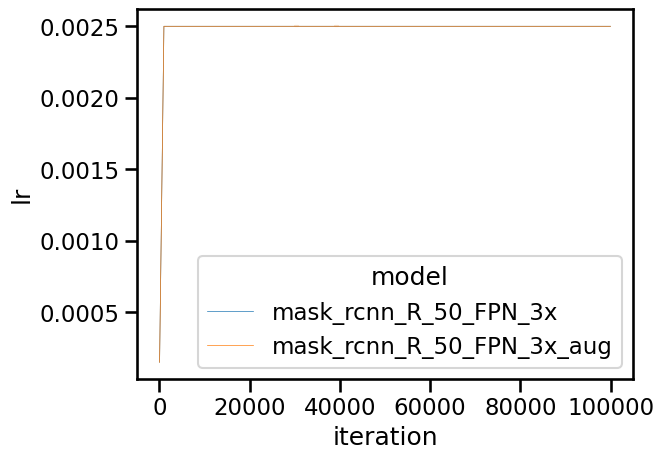

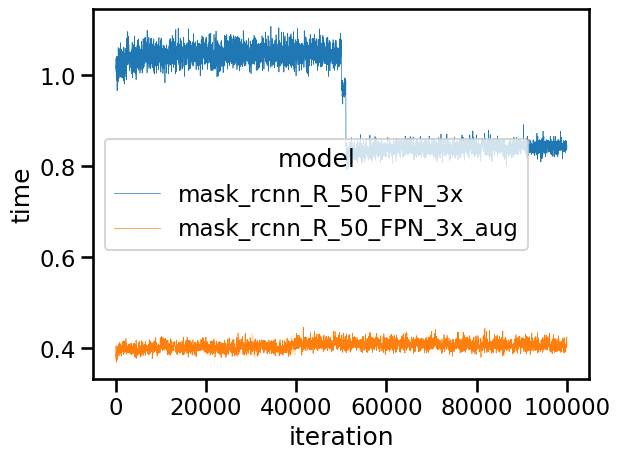

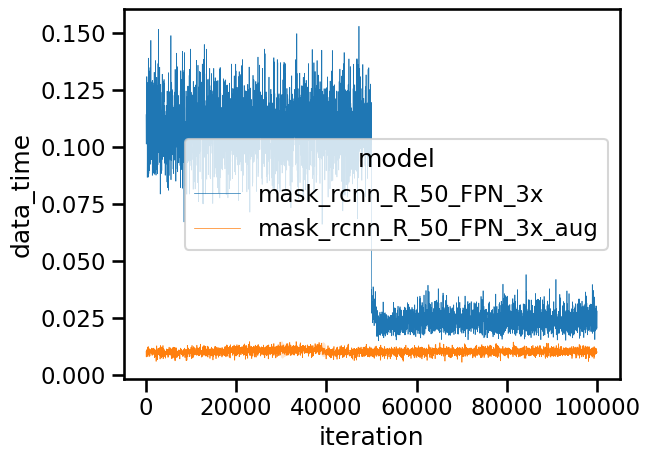

In [11]:
for var in ['lr','time','data_time']:
    plt.figure()
    sns.lineplot(linewidth=0.5,y=var,data=df[df['iteration']>50],x='iteration',hue='model')